In [1]:
import csv
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [6]:

df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Now 'df' contains the DataFrame without the specified columns

df.head()

,Time,Operation,Base_Asset,Realized_Amount_For_Base_Asset,Realized_Amount_For_Base_Asset_In_USD_Value,Quote_Asset,Realized_Amount_For_Quote_Asset_In_USD_Value
0,2023-06-01 17:32:14,Buy,BTC,0.00114,30.574769,USDT,30.754898
1,2023-06-01 17:32:14,Buy,BTC,0.00015,4.022996,USDT,4.046708
2,2023-06-01 17:50:00,Sell,BTC,0.00120,32.183968,USDT,32.391607
3,2023-06-01 17:50:00,Sell,BTC,0.00009,2.413798,USDT,2.429371
4,2023-06-02 05:41:46,Sell,BTC,0.00184,50.139244,USDT,50.043622


In [62]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Sort DataFrame by 'Time' for better analysis
df = df.sort_values(by='Time')

# Calculate total trade
total_trades = df.shape[0]

# Calculate average trade size
average_trade_size = df['Realized_Amount_For_Base_Asset'].mean()

# Calculate total buys and sells
total_buys = df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset'].sum()
total_sells = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset'].sum()

# Calculate total sell over buy
total_sell_over_buy = df[df['Operation'] == 'Sell'].shape[0] - df[df['Operation'] == 'Buy'].shape[0]

# Print the results
print(f'Total Trades: {total_trades}')
print(f'Average Trade Size: {average_trade_size}')
print(f'Toal Buys: {total_buys}, Total Sells: {total_sells}, Total Sell Over Buy: {total_sell_over_buy}')


Total Trades: 10111
Average Trade Size: 0.0004889041637820196
Toal Buys: 2.45795, Total Sells: 2.48536, Total Sell Over Buy: 155


In [57]:
import pandas as pd

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Sort DataFrame by 'Time' for better analysis
df = df.sort_values(by='Time')

# Calculate the amount gained
amount_gained = df[df['Operation'] == 'Sell']['Realized_Amount_For_Base_Asset'].sum() - df[df['Operation'] == 'Buy']['Realized_Amount_For_Base_Asset'].sum()

# Print the result
print(f'Amount Gained: {amount_gained}')


Amount Gained: 0.027410000000000156


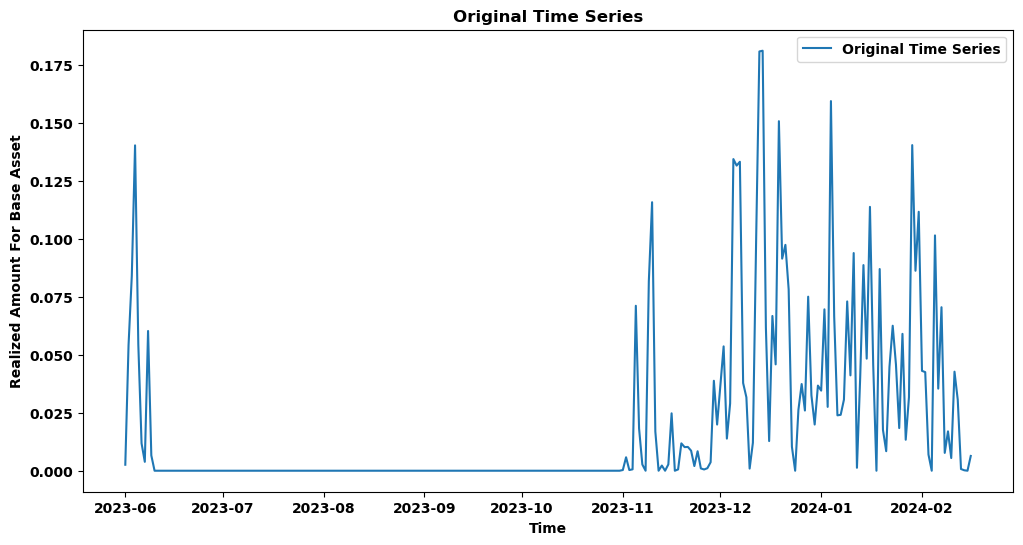

<Figure size 1200x800 with 0 Axes>

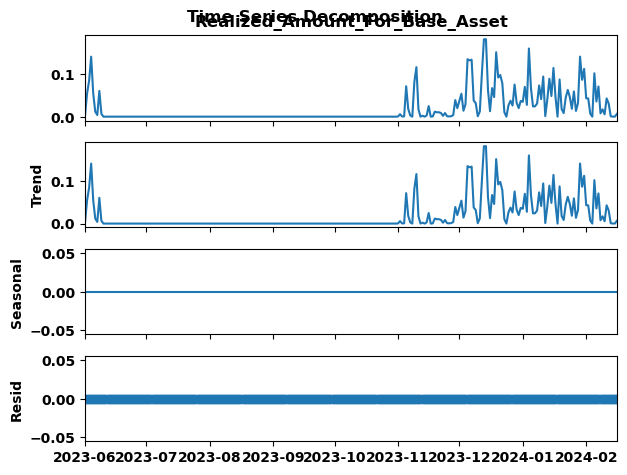

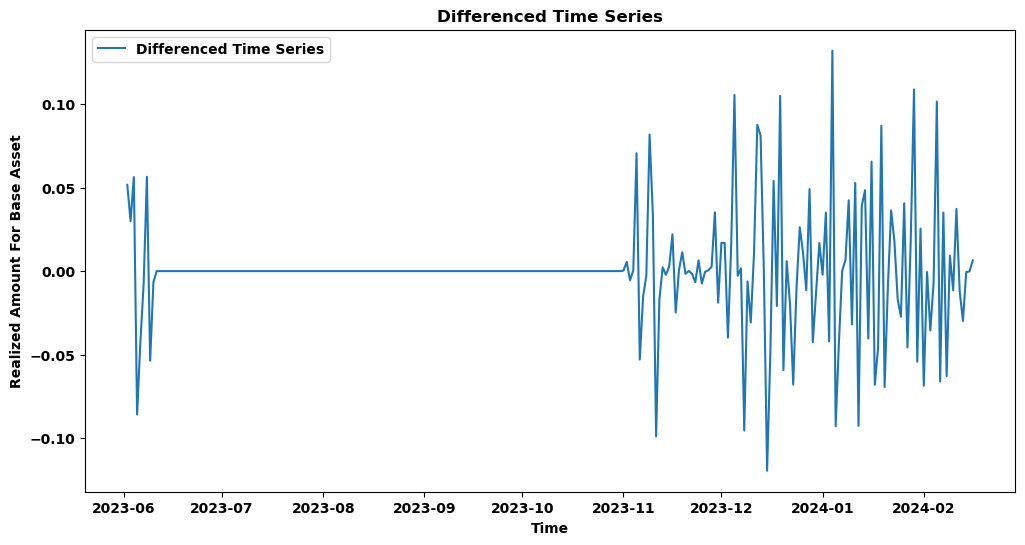

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Set 'Time' column as the index
df = df.set_index('Time')

# Resample data to daily frequency, you can change it based on your data
df_resampled = df.resample('D').sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled['Realized_Amount_For_Base_Asset'], label='Original Time Series')
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Realized Amount For Base Asset')
plt.legend()
plt.show()

# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(df_resampled['Realized_Amount_For_Base_Asset'], model='additive', period=1)  # Change period based on your data frequency

# Plot the decomposition components
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()

# Plot trends and patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_resampled['Realized_Amount_For_Base_Asset'].diff().dropna(), label='Differenced Time Series')
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Realized Amount For Base Asset')
plt.legend()
plt.show()


In [56]:
import pandas as pd
import hvplot.pandas as hv
from bokeh.models import HoverTool
from bokeh.palettes import Greens, Reds
import yfinance as yf

# Load CSV file into DataFrame
df = pd.read_csv('tilFeb.csv')

# List of columns to drop
columns_to_drop = ['User_Id', 'Order_Id', 'Transaction_Id', 'Primary_Asset', 
                   'Realized_Amount_For_Primary_Asset', 'Realized_Amount_For_Primary_Asset_In_USD_Value', 'Payment_Method', 'Withdrawal_Method', 'Additional_Note', 'Realized_Amount_For_Fee_Asset_In_USD_Value', 'Realized_Amount_For_Quote_Asset', 'Realized_Amount_For_Fee_Asset', 'Fee_Asset', 'Category']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

# Convert 'Time' column to datetime type
df['Time'] = pd.to_datetime(df['Time'])

# Create separate DataFrames for Buys and Sells
df_buys = df[df['Operation'] == 'Buy']
df_sells = df[df['Operation'] == 'Sell']

# Fetch Bitcoin historical data using yfinance
btc_data = yf.download('BTC-USD', start='2023-11-15', end='2024-02-15')

# Convert 'Date' index to datetime type
btc_data.index = pd.to_datetime(btc_data.index)

# Scatter Plot for Buys (Green) and Sells (Red) on the same plot
scatter_plot = df.hvplot.scatter(
    x='Time', y='Realized_Amount_For_Base_Asset', color=df['Operation'].map({'Buy': Greens[3][1], 'Sell': Reds[3][1]}), size=30,
    width=1200, height=1200, padding=0.1,
    title='Futuristic Scatter Plot with BTC Overlay',
    xlabel='Time', ylabel='Realized Amount For Base Asset',
    hover_cols=['Realized_Amount_For_Base_Asset']
).opts(tools=[HoverTool(tooltips=[('Value', '@Realized_Amount_For_Base_Asset')])])


# Display Plots
scatter_plot



[*********************100%***********************]  1 of 1 completed


:Scatter   [Time]   (Realized_Amount_For_Base_Asset,_color)

In [51]:
import yfinance as yf
import pandas as pd
import hvplot.pandas as hv
from bokeh.models import HoverTool
from bokeh.palettes import Blues, Greens, Reds

# Fetch Bitcoin historical data using yfinance
btc_data = yf.download('BTC-USD', start='2023-11-15', end='2024-02-15')

# Assuming df_buys and df_sells are your DataFrames for buys and sells
# Update the columns to match your data if needed
df_buys = df[df['Operation'] == 'Buy']
df_sells = df[df['Operation'] == 'Sell']

# Convert 'Date' index to datetime type
btc_data.index = pd.to_datetime(btc_data.index)

# Create separate DataFrames for Buys and Sells
df_buys = df_buys.set_index('Time')
df_sells = df_sells.set_index('Time')

# Scatter Plot for Buys (Green)
scatter_buys = df_buys.hvplot.scatter(
    x='Time', y='Realized_Amount_For_Base_Asset', color=Greens[3][2], size=10,
    width=800, height=400, padding=0.1,
    title='Futuristic Scatter Plot (Buys) with BTC Overlay',
    xlabel='Time', ylabel='Realized Amount For Base Asset',
    hover_cols=['Realized_Amount_For_Base_Asset']
).opts(tools=[HoverTool(tooltips=[('Value', '@Realized_Amount_For_Base_Asset')])])

# Scatter Plot for Sells (Red)
scatter_sells = df_sells.hvplot.scatter(
    x='Time', y='Realized_Amount_For_Base_Asset', color=Reds[3][2], size=10,
    width=800, height=400, padding=0.1,
    title='Futuristic Scatter Plot (Sells) with BTC Overlay',
    xlabel='Time', ylabel='Realized Amount For Base Asset',
    hover_cols=['Realized_Amount_For_Base_Asset']
).opts(tools=[HoverTool(tooltips=[('Value', '@Realized_Amount_For_Base_Asset')])])

# Line plot for BTC prices
btc_line = btc_data['Close'].hvplot.line(
    width=2, color='blue', legend_label='BTC Price',
    xlabel='Date', ylabel='BTC Price (USD)',
    title='Bitcoin Price Overlaid with Buys and Sells'
)

# Display Plots
(scatter_buys * scatter_sells * btc_line).cols(1)


[*********************100%***********************]  1 of 1 completed

AttributeError: 'Overlay' object has no attribute cols.

In [24]:
import pandas as pd
import hvplot.pandas  # Import hvplot module
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with all the trades

# Plotting Buys as a blue line
df_buy = df[df['Operation'] == 'Buy']
buys_plot = df_buy.hvplot(x='Time', y='Realized_Amount_For_Base_Asset', line_color='blue', line_dash='solid', label='Buys')

# Plotting Sells as a red line
df_sell = df[df['Operation'] == 'Sell']
sells_plot = df_sell.hvplot(x='Time', y='Realized_Amount_For_Base_Asset', line_color='red', line_dash='solid', label='Sells')

# Combine the plots
combined_plot = buys_plot * sells_plot

# Customize the plot
combined_plot

# Show the plot
combined_plot


:Overlay
   .Curve.Buys  :Curve   [Time]   (Realized_Amount_For_Base_Asset)
   .Curve.Sells :Curve   [Time]   (Realized_Amount_For_Base_Asset)